# MOHIT KESHWANI

# Introduction


I am going to work on evaluating price of houses given the following features:

1. Year of sale of the house
2. The age of the house at the time of sale
3. Distance from city center
4. Number of stores in the locality
5. The latitude
6. The longitude


# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from utils import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback

import warnings
warnings.filterwarnings("ignore")

print('Libraries imported.')

Libraries imported.


# Importing the Data

In [2]:
df = pd.read_csv('data.csv', names = column_names) 
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


In [3]:
df.isna().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

# Data Normalization

In [4]:
df = df.iloc[:,1:]
df_norm = (df - df.mean()) / df.std()
df_norm.head()

,date,age,distance,stores,latitude,longitude,price
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799,0.350088
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799,-1.836486
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456,-0.339584
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803,-1.839425
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141,0.245266


In [5]:
y_mean = df['price'].mean()
y_std = df['price'].std()

def convert_label_value(pred):
    return int(pred * y_std + y_mean)

print(convert_label_value(0.350088))

14263


# Create Training and Test Sets

In [6]:
X = df_norm.iloc[:, :6]
X.head()

,date,age,distance,stores,latitude,longitude
0,0.015978,0.181384,1.257002,0.345224,-0.307212,-1.260799
1,-0.350485,-1.319118,-0.930610,-0.609312,0.325301,-1.260799
2,1.298598,-0.083410,-0.618094,0.663402,1.590328,-1.576456
3,-1.266643,-0.524735,-0.930610,-0.927491,-1.572238,0.948803
4,0.932135,0.534444,0.006938,0.981581,-1.255981,-0.945141


In [7]:
Y = df_norm.iloc[:, -1]
Y.head()

0    0.350088
1   -1.836486
2   -0.339584
3   -1.839425
4    0.245266
Name: price, dtype: float64

In [8]:
X_arr = X.values
Y_arr = Y.values

print('X_arr shape: ', X_arr.shape)
print('Y_arr shape: ', Y_arr.shape)

X_arr shape:  (5000, 6)
Y_arr shape:  (5000,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, Y_arr, test_size = 0.05, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (4750, 6)
y_train shape:  (4750,)
X_test shape:  (250, 6)
y_test shape:  (250,)


# Create the Model

In [10]:
def Network():
    
    model = Sequential([
        Dense(10, input_shape = (6,), activation = 'relu'),
        Dense(20, activation = 'relu'),
        Dense(5, activation = 'relu'),
        Dense(1)
    ])

    model.compile(
        loss='mse',
        optimizer='adadelta'
    )
    
    return model

model = Network()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


# Model Training

In [11]:
early_stopping = EarlyStopping(monitor='val_loss', patience = 5)

model = Network()

preds_on_untrained = model.predict(X_test)

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 1000,
    callbacks = [early_stopping]
)

Epoch 1/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.9926 - val_loss: 0.8357
Epoch 2/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9914 - val_loss: 0.8348
Epoch 3/1000
149/149 [==============================] - 0s 964us/step - loss: 0.9904 - val_loss: 0.8341
Epoch 4/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9894 - val_loss: 0.8334
Epoch 5/1000
149/149 [==============================] - 0s 887us/step - loss: 0.9885 - val_loss: 0.8327
Epoch 6/1000
149/149 [==============================] - 0s 905us/step - loss: 0.9876 - val_loss: 0.8320
Epoch 7/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9867 - val_loss: 0.8313
Epoch 8/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9859 - val_loss: 0.8307
Epoch 9/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.9850 - val_loss: 0.8300
Epoch 10/1000
149/149 [==============================] - 0s 934us/step - los

149/149 [==============================] - 0s 837us/step - loss: 0.8652 - val_loss: 0.7335
Epoch 157/1000
149/149 [==============================] - 0s 817us/step - loss: 0.8644 - val_loss: 0.7328
Epoch 158/1000
149/149 [==============================] - 0s 818us/step - loss: 0.8635 - val_loss: 0.7322
Epoch 159/1000
149/149 [==============================] - 0s 836us/step - loss: 0.8627 - val_loss: 0.7315
Epoch 160/1000
149/149 [==============================] - 0s 883us/step - loss: 0.8619 - val_loss: 0.7309
Epoch 161/1000
149/149 [==============================] - 0s 963us/step - loss: 0.8612 - val_loss: 0.7302
Epoch 162/1000
149/149 [==============================] - 0s 842us/step - loss: 0.8604 - val_loss: 0.7295
Epoch 163/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.8596 - val_loss: 0.7289
Epoch 164/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.8588 - val_loss: 0.7283
Epoch 165/1000
149/149 [==============================] - 0s 909u

Epoch 234/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.8040 - val_loss: 0.6821
Epoch 235/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.8033 - val_loss: 0.6814
Epoch 236/1000
149/149 [==============================] - 0s 803us/step - loss: 0.8025 - val_loss: 0.6808
Epoch 237/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.8018 - val_loss: 0.6801
Epoch 238/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.8010 - val_loss: 0.6795
Epoch 239/1000
149/149 [==============================] - 0s 991us/step - loss: 0.8002 - val_loss: 0.6788
Epoch 240/1000
149/149 [==============================] - 0s 920us/step - loss: 0.7995 - val_loss: 0.6782
Epoch 241/1000
149/149 [==============================] - 0s 851us/step - loss: 0.7988 - val_loss: 0.6775
Epoch 242/1000
149/149 [==============================] - 0s 832us/step - loss: 0.7980 - val_loss: 0.6769
Epoch 243/1000
149/149 [==============================

149/149 [==============================] - 0s 842us/step - loss: 0.6908 - val_loss: 0.5830
Epoch 389/1000
149/149 [==============================] - 0s 824us/step - loss: 0.6901 - val_loss: 0.5823
Epoch 390/1000
149/149 [==============================] - 0s 824us/step - loss: 0.6894 - val_loss: 0.5817
Epoch 391/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.6887 - val_loss: 0.5811
Epoch 392/1000
149/149 [==============================] - 0s 970us/step - loss: 0.6879 - val_loss: 0.5805
Epoch 393/1000
149/149 [==============================] - 0s 887us/step - loss: 0.6872 - val_loss: 0.5798
Epoch 394/1000
149/149 [==============================] - 0s 924us/step - loss: 0.6865 - val_loss: 0.5792
Epoch 395/1000
149/149 [==============================] - 0s 928us/step - loss: 0.6858 - val_loss: 0.5786
Epoch 396/1000
149/149 [==============================] - 0s 920us/step - loss: 0.6851 - val_loss: 0.5779
Epoch 397/1000
149/149 [==============================] - 0s 84

149/149 [==============================] - 0s 852us/step - loss: 0.5767 - val_loss: 0.4822
Epoch 543/1000
149/149 [==============================] - 0s 832us/step - loss: 0.5759 - val_loss: 0.4816
Epoch 544/1000
149/149 [==============================] - 0s 815us/step - loss: 0.5752 - val_loss: 0.4809
Epoch 545/1000
149/149 [==============================] - 0s 823us/step - loss: 0.5744 - val_loss: 0.4803
Epoch 546/1000
149/149 [==============================] - 0s 820us/step - loss: 0.5737 - val_loss: 0.4797
Epoch 547/1000
149/149 [==============================] - 0s 843us/step - loss: 0.5729 - val_loss: 0.4791
Epoch 548/1000
149/149 [==============================] - 0s 857us/step - loss: 0.5722 - val_loss: 0.4785
Epoch 549/1000
149/149 [==============================] - 0s 837us/step - loss: 0.5715 - val_loss: 0.4779
Epoch 550/1000
149/149 [==============================] - 0s 819us/step - loss: 0.5708 - val_loss: 0.4772
Epoch 551/1000
149/149 [==============================] - 0s 

149/149 [==============================] - 0s 827us/step - loss: 0.5186 - val_loss: 0.4330
Epoch 620/1000
149/149 [==============================] - 0s 844us/step - loss: 0.5179 - val_loss: 0.4323
Epoch 621/1000
149/149 [==============================] - 0s 830us/step - loss: 0.5171 - val_loss: 0.4317
Epoch 622/1000
149/149 [==============================] - 0s 814us/step - loss: 0.5164 - val_loss: 0.4310
Epoch 623/1000
149/149 [==============================] - 0s 824us/step - loss: 0.5156 - val_loss: 0.4304
Epoch 624/1000
149/149 [==============================] - 0s 815us/step - loss: 0.5148 - val_loss: 0.4298
Epoch 625/1000
149/149 [==============================] - 0s 846us/step - loss: 0.5141 - val_loss: 0.4291
Epoch 626/1000
149/149 [==============================] - 0s 815us/step - loss: 0.5133 - val_loss: 0.4285
Epoch 627/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.5125 - val_loss: 0.4278
Epoch 628/1000
149/149 [==============================] - 0s 89

Epoch 697/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4606 - val_loss: 0.3865
Epoch 698/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4599 - val_loss: 0.3860
Epoch 699/1000
149/149 [==============================] - 0s 890us/step - loss: 0.4592 - val_loss: 0.3855
Epoch 700/1000
149/149 [==============================] - 0s 861us/step - loss: 0.4585 - val_loss: 0.3849
Epoch 701/1000
149/149 [==============================] - 0s 950us/step - loss: 0.4578 - val_loss: 0.3844
Epoch 702/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4571 - val_loss: 0.3839
Epoch 703/1000
149/149 [==============================] - 0s 2ms/step - loss: 0.4564 - val_loss: 0.3833
Epoch 704/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4557 - val_loss: 0.3828
Epoch 705/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.4550 - val_loss: 0.3823
Epoch 706/1000
149/149 [==============================] - 

149/149 [==============================] - 0s 909us/step - loss: 0.3679 - val_loss: 0.3181
Epoch 852/1000
149/149 [==============================] - 0s 1000us/step - loss: 0.3675 - val_loss: 0.3177
Epoch 853/1000
149/149 [==============================] - 0s 1ms/step - loss: 0.3670 - val_loss: 0.3173
Epoch 854/1000
149/149 [==============================] - 0s 955us/step - loss: 0.3665 - val_loss: 0.3170
Epoch 855/1000
149/149 [==============================] - 0s 865us/step - loss: 0.3660 - val_loss: 0.3167
Epoch 856/1000
149/149 [==============================] - 0s 873us/step - loss: 0.3655 - val_loss: 0.3163
Epoch 857/1000
149/149 [==============================] - 0s 871us/step - loss: 0.3651 - val_loss: 0.3160
Epoch 858/1000
149/149 [==============================] - 0s 868us/step - loss: 0.3646 - val_loss: 0.3156
Epoch 859/1000
149/149 [==============================] - 0s 930us/step - loss: 0.3641 - val_loss: 0.3153
Epoch 860/1000
149/149 [==============================] - 0s 8

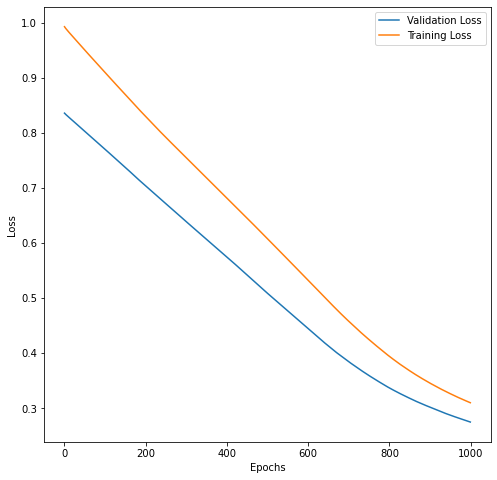

In [12]:
plot_loss(history)

# Predictions

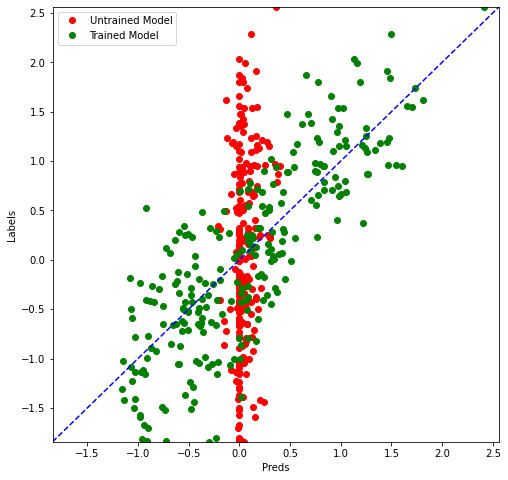

In [13]:
preds_on_trained = model.predict(X_test)

compare_predictions(preds_on_untrained, preds_on_trained, y_test)

# Plot Price Predictions


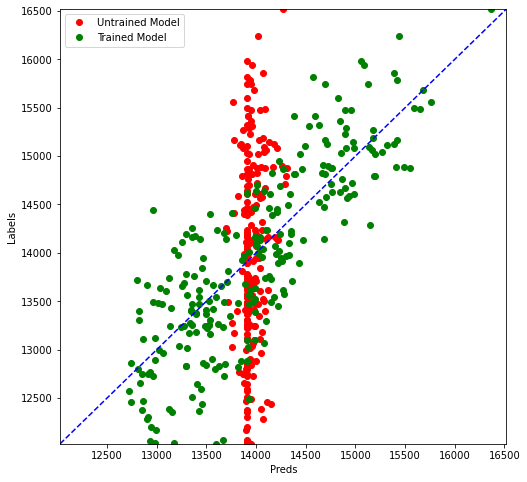

In [14]:
price_on_untrained = [convert_label_value(y) for y in preds_on_untrained]
price_on_trained = [convert_label_value(y) for y in preds_on_trained]
price_y_test = [convert_label_value(y) for y in y_test]

compare_predictions(price_on_untrained, price_on_trained, price_y_test)